# AR

AR (AutoRegressive) models and Linear Regression share some similarities but serve different purposes, especially when it comes to time series data. 

## 1. Purpose
**Linear Regression:** Used to model relationships between variables (predict the value of a dependent variable based on independent variables). It is typically used for cross-sectional data.
<br>
**AR Model:** Used to model time series data by predicting the future value based on past values of the same variable. It is used to capture temporal dependencies in a series.

## 2. Predictors
**Linear Regression:** Uses external predictors (independent variables) to explain the dependent variable.
<br>**Example:** Predicting house prices based on factors like size, number of rooms, and location.
<br>
**AR Model:** Uses past values of the same time series to predict the future value.
<br>**Example:** Predicting today's stock price based on its past price values.

# Linear Regression

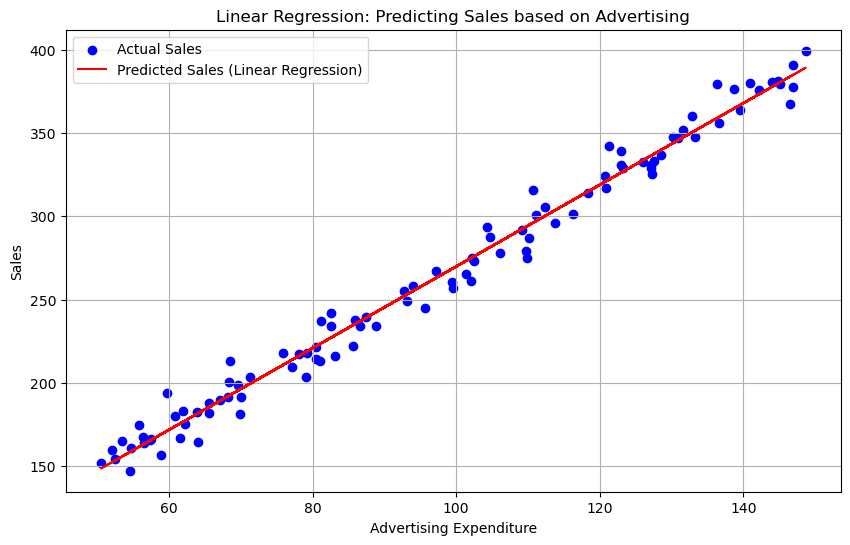

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(42)
advertising = np.random.uniform(50, 150, size=100)  # Advertising expenditure
sales = 20 + 2.5 * advertising + np.random.normal(0, 10, size=100)  # Sales with some noise

X = advertising.reshape(-1, 1)
model = LinearRegression()
model.fit(X, sales)
predicted_sales = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(advertising, sales, label='Actual Sales', color='blue')
plt.plot(advertising, predicted_sales, label='Predicted Sales (Linear Regression)', color='red')
plt.title('Linear Regression: Predicting Sales based on Advertising')
plt.xlabel('Advertising Expenditure')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()


Here, Linear Regression is used to predict sales based on advertising expenditure. You’re using an external variable (advertising) to predict the target (sales).

# Autoregressive

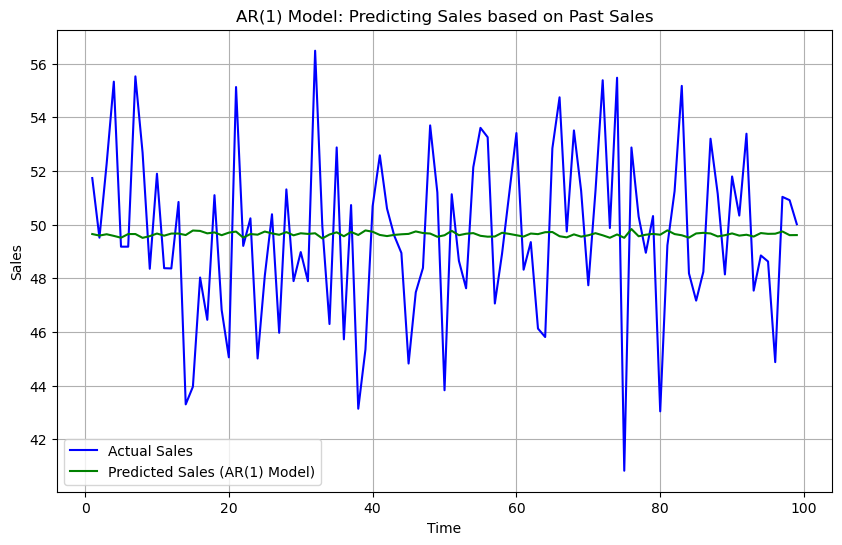

In [2]:
from statsmodels.tsa.ar_model import AutoReg

np.random.seed(42)
time = np.arange(100)
actual_sales = 50 + 0.7 * np.roll(np.random.normal(0, 5, size=100), shift=1) 

ar_model = AutoReg(actual_sales, lags=1)
ar_result = ar_model.fit()
predicted_sales_ar1 = ar_result.predict(start=1, end=99)  

plt.figure(figsize=(10, 6))
plt.plot(time[1:], actual_sales[1:], label='Actual Sales', color='blue')
plt.plot(time[1:], predicted_sales_ar1, label='Predicted Sales (AR(1) Model)', color='green')
plt.title('AR(1) Model: Predicting Sales based on Past Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()


## Key Differences Between Linear Regression and AR (AutoRegressive) Model

| **Feature**            | **Linear Regression**                                         | **AR (AutoRegressive) Model**                              |
|------------------------|---------------------------------------------------------------|------------------------------------------------------------|
| **Purpose**             | Predict target based on independent variables                 | Predict future values based on past values of the same series |
| **Input**               | Independent variables (external predictors)                   | Past values of the same time series                         |
| **Type of Data**        | Cross-sectional data or time-independent data                 | Time series data                                            |
| **Dependencies**        | No temporal dependencies                                      | Strong temporal dependencies                               |
| **Predicting**          | Based on external factors                                     | Based on historical values of the target itself             |


## AR(1) Model OLS Estimation

In an AR(1) model, today's value \(y_t\) is influenced by the previous day's value \(y_{t-1}\). The general form is:

y 
t
​
 =ϕ 
1
​
 y 
t−1
​
 +ϵ 
t
​

where ϕ1 is the coefficient we want to estimate, and ϵt is the error term (difference between actual and predicted).

### Example Data:
Let’s use the data:

y = [5, 7, 6, 9, 8]

### Step 1: Rearrange the Data
For an AR(1) model, you are predicting today’s value based on yesterday’s value. So, let's create two sequences:

- \(y_t\) (the values we want to predict): \([7, 6, 9, 8]\)
- \(y_{t-1}\) (the previous day’s values): \([5, 7, 6, 9]\)

Here’s how it looks:


\begin{array}{|c|c|}
\hline
y_t & y_{t-1} \\
\hline
7 & 5 \\
6 & 7 \\
9 & 6 \\
8 & 9 \\
\hline
\end{array}


### Step 2: Set up the OLS Formula
The OLS formula for estimating ϕ1 is:

$$
\phi_1 = \frac{\sum(y_{t-1} \cdot y_t)}{\sum(y_{t-1}^2)}
$$

This formula finds the best fit by minimizing the squared errors between actual and predicted values.

### Step 3: Plug in the Values

Now we’ll calculate each part:

1. $\(\sum(y_{t-1} \cdot y_t)\$):
   

   $$
   (5 \times 7) + (7 \times 6) + (6 \times 9) + (9 \times 8) = 35 + 42 + 54 + 72 = 203
   $$

2. $\(\sum(y_{t-1}^2)\$):

   $$
   (5^2) + (7^2) + (6^2) + (9^2) = 25 + 49 + 36 + 81 = 191
   $$

### Step 4: Calculate \$(\phi_1\)$

Now, we divide:

$$
\phi_1 = \frac{203}{191} \approx 1.063
$$

So, the AR(1) coefficient $\(\phi_1\$) is approximately \(1.063\).

### Step 5: Predicting y_t+1
where
$
y_{t+1} = \phi_1 y_t + \epsilon_{t+1}
$

Assuming the error term $\epsilon_{t+1}$ is 0 , the predicted value for $y_{t+1}$ would be:

$
y_{t+1} = 1.063 \times 8 = 8.504
$

Thus, the predicted future value of $y_t$ is approximately 8.504.


In [3]:
import numpy as np

y_t = np.array([7, 6, 9, 8])    
y_t_1 = np.array([5, 7, 6, 9])  

numerator = np.sum(y_t_1 * y_t)

denominator = np.sum(y_t_1 ** 2)

phi_1 = numerator / denominator

print(f"The AR(1) coefficient (phi_1) is: {phi_1:.3f}")


The AR(1) coefficient (phi_1) is: 1.063


In [4]:
error_t_1 = 0
y_next = phi_1*y_t[3] + error_t_1
y_next

8.502617801047121

# Linear reggression 

### Linear Regression OLS Estimation

In linear regression, you're predicting \(y\) (the dependent variable) based on \(X\) (the independent variables). The general form is:

$$
y = \beta_0 + \beta_1 X + \epsilon
$$

where:

- $\beta_0$ is the intercept,
- $\beta_1$ is the slope coefficient (like $\phi_1$ in AR(1)),
- $X$ is the independent variable,
- $\epsilon$ is the error term.

### Example Data for Linear Regression

Imagine you have the same \(y\) values, but now you want to predict \(y\) based on some independent variable \(X\) (like advertising spend or temperature):

$$
X = [2, 4, 3, 5, 4]
$$

$$
y = [5, 7, 6, 9, 8]
$$

### Step 1: Set up the OLS Formula for Linear Regression

The OLS formula for the slope \(\beta_1\) is:

$$
\beta_1 = \frac{\sum(X \cdot y) - n \cdot \frac{\sum X \cdot \sum y}{n}}{\sum(X^2) - n \cdot \left(\frac{\sum X}{n}\right)^2}
$$

where \(n\) is the number of data points.

### Step 2: Plug in the Values

Let’s calculate each part:

1. $\(\sum X\$):

   $$
   2 + 4 + 3 + 5 + 4 = 18
   $$

2. $\(\sum y\$):

   $$
   5 + 7 + 6 + 9 + 8 = 35
   $$

3. $\(\sum(X \cdot y)\$):

   $$
   (2 \times 5) + (4 \times 7) + (3 \times 6) + (5 \times 9) + (4 \times 8) = 10 + 28 + 18 + 45 + 32 = 133
   $$

4. $\(\sum(X^2)\$):

   $$
   (2^2) + (4^2) + (3^2) + (5^2) + (4^2) = 4 + 16 + 9 + 25 + 16 = 70
   $$

Now plug these values into the formula:

$$
\beta_1 = \frac{133 - \frac{18 \times 35}{5}}{70 - \frac{(18)^2}{5}}
$$

Calculating the components:

1. $\frac{18 \times 35}{5} = 126$

2. $\frac{(18)^2}{5} = 64.8$

Now substituting these back:

$$
\beta_1 = \frac{133 - 126}{70 - 64.8} = \frac{7}{5.2} \approx 1.346
$$

### Step 3: Calculate $(\beta_0)$ (Intercept)

The intercept is calculated as:

$$
\beta_0 = \frac{\sum y}{n} - \beta_1 \cdot \frac{\sum X}{n}
$$

Calculating $\(\beta_0\$):

$$
\beta_0 = \frac{35}{5} - 1.346 \cdot \frac{18}{5} = 7 - 1.346 \cdot 3.6 = 7 - 4.846 = 2.154
$$

So, the linear regression equation is:

$$
y = 2.154 + 1.346 \cdot X
$$


## Step 4: Predicting

To predict $y_{t+1}$ using the linear regression equation

lets just say i want too predict the value when $x = 8$

$[
y = 2.154 + 1.346 \cdot X
]
$
For $X = 8$:

$[
y_{t+1} = 2.154 + 1.346 * 8 = 2.154 + 10.768 = 12.922
]$

Thus, the predicted value for $y_{t+1}$ is approximately 12.922


In [5]:
import numpy as np

X = np.array([2, 4, 3, 5, 4])   
y = np.array([5, 7, 6, 9, 8])   

n = len(X) 
sum_X = np.sum(X)  
sum_y = np.sum(y)  
sum_X_y = np.sum(X * y)  
sum_X2 = np.sum(X ** 2)  

beta_1_numerator = sum_X_y - (sum_X * sum_y) / n
beta_1_denominator = sum_X2 - (sum_X ** 2) / n
beta_1 = beta_1_numerator / beta_1_denominator

beta_0 = (sum_y / n) - (beta_1 * sum_X / n)

print(f"The slope (beta_1) is: {beta_1:.3f}")
print(f"The intercept (beta_0) is: {beta_0:.3f}")

print(f"The linear regression equation is: y = {beta_0:.3f} + {beta_1:.3f} * X")


The slope (beta_1) is: 1.346
The intercept (beta_0) is: 2.154
The linear regression equation is: y = 2.154 + 1.346 * X


In [6]:
x_next = 8
y_next = beta_0 + beta_1* x_next
y_next

12.92307692307692

### Summary Comparison

| Feature                     | AR(1) Model                                           | Linear Regression                                |
|-----------------------------|-------------------------------------------------------|--------------------------------------------------|
| **Predictors**              | Past value of the same variable \(y_{t-1}\)          | External variables (like \(X\))                  |
| **Form of the Model**       | \(y_{t} = \phi_{1} y_{t-1} + \epsilon_{t}\)         | \(y = \beta_{0} + \beta_{1} X + \epsilon\)    |
| **OLS Calculation**         | Only involves past values of \(y\)                    | Involves independent variables \(X\) and \(y\)  |
| **Coefficient Estimate**    | \(\phi_{1} \approx 1.063\)                           | \(\beta_{1} \approx 1.346\), \(\beta_{0} \approx 2.154\) |

### Key Takeaways

- In the AR(1) model, the only predictor is the past value of the time series.
- In linear regression, you have external predictors (\(X\)) that explain the variation in \(y\).


### Significance of Coefficients in AR(1) and Linear Regression Models


| Term      | Model           | Significance                                                                                   |
|-----------|------------------|-----------------------------------------------------------------------------------------------|
| \( \phi_1 \)  | AR(1) Model     | Measures how much the previous value \( y_{t-1} \) affects the current value \( y_{t} \). Indicates the strength of autoregressive dependence. |
| \( \beta_0 \) | Linear Regression | The intercept. Represents the baseline value of \( y \) when \( X = 0 \).                             |
| \( \beta_1 \) | Linear Regression | The slope. Measures how much \( y \) changes for a one-unit change in \( X \). Describes the linear relationship between \( y \) and \( X \). |

Each coefficient provides insight into the relationships between variables, whether predicting future values based on past values or assessing the influence of independent variables.


#### Simplified Interpretation:
- $ \phi_1 $: Tells you how much your current value depends on past values.
- $\beta_1 $: Tells you how much your current value depends on an external factor (the independent variable).
